In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.shape        #find the shape of Datafram

(284807, 31)

In [4]:
df.describe()     #Find the Statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


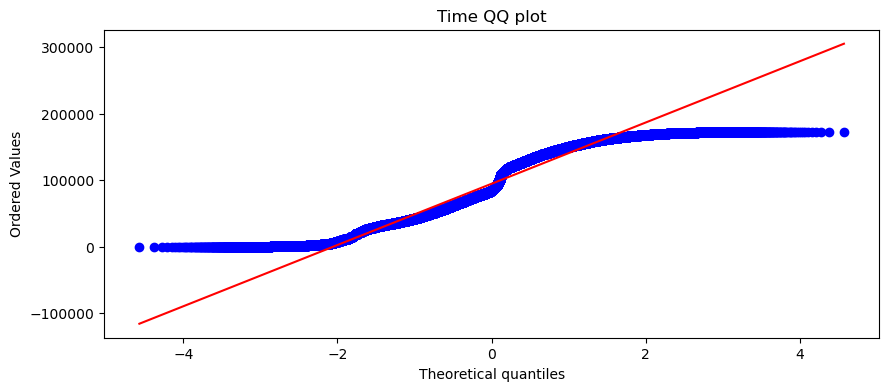

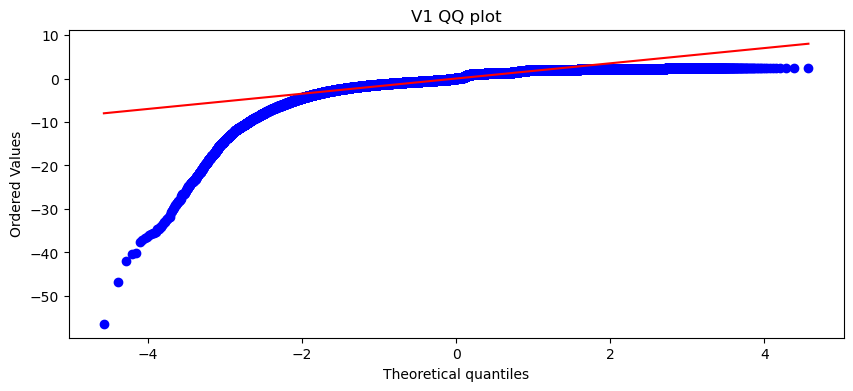

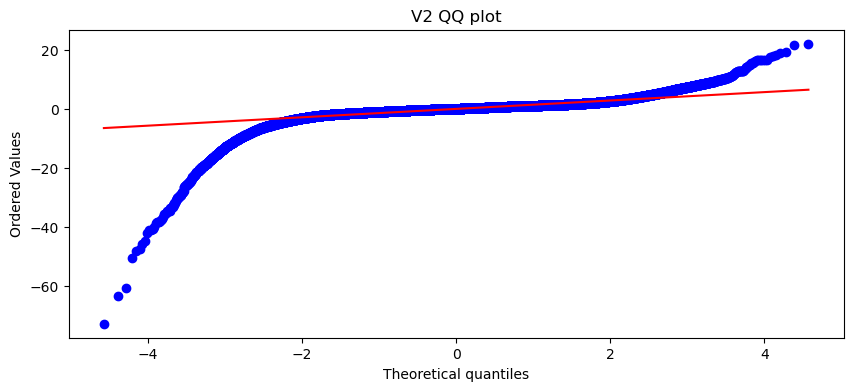

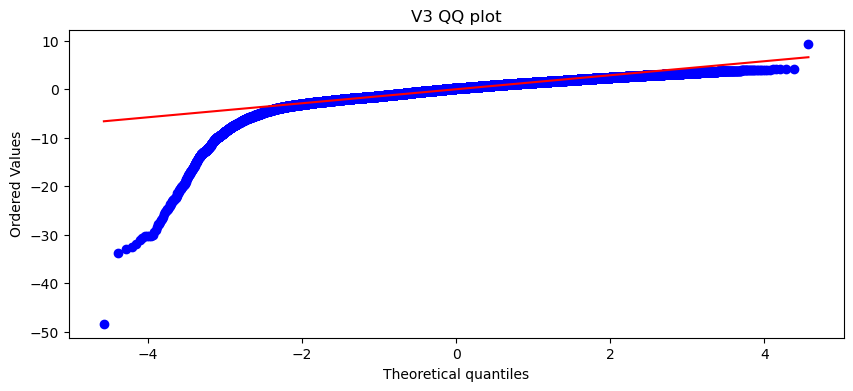

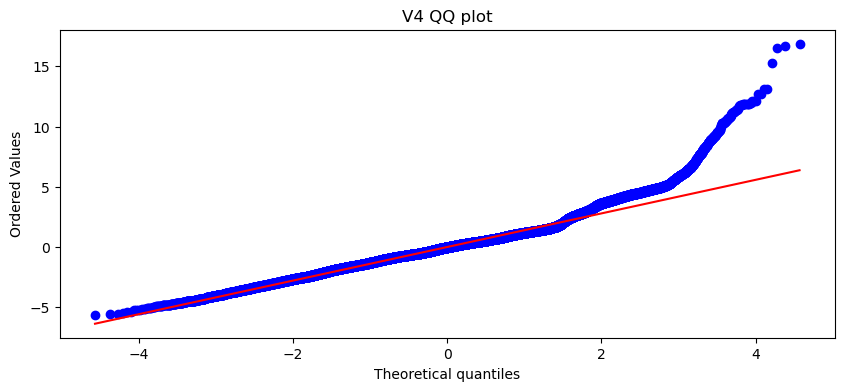

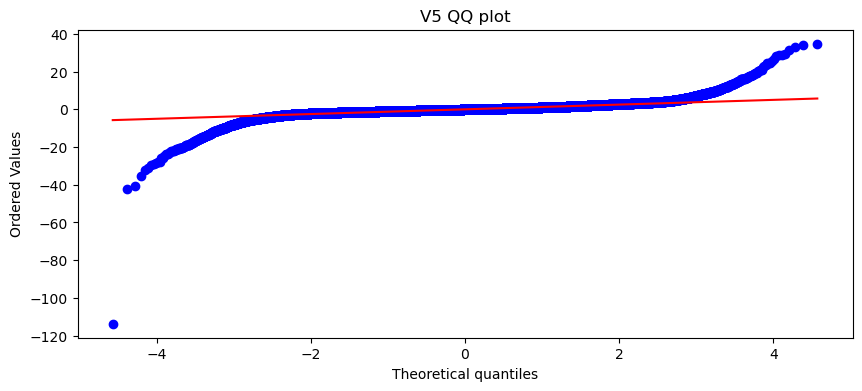

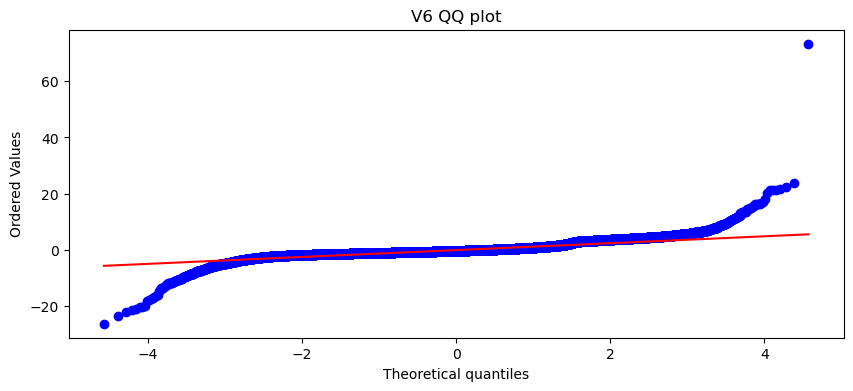

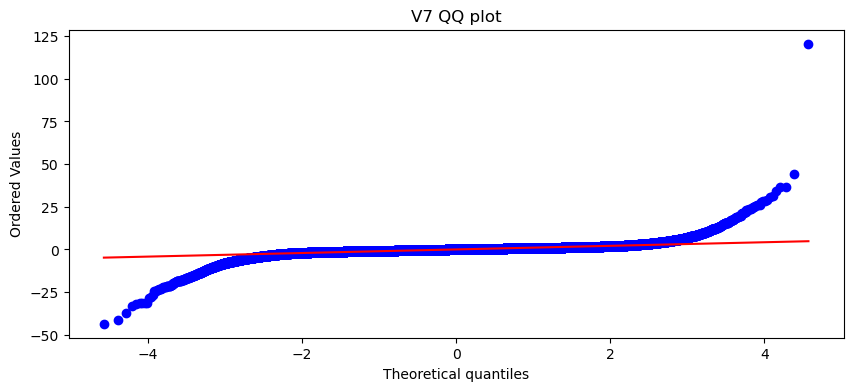

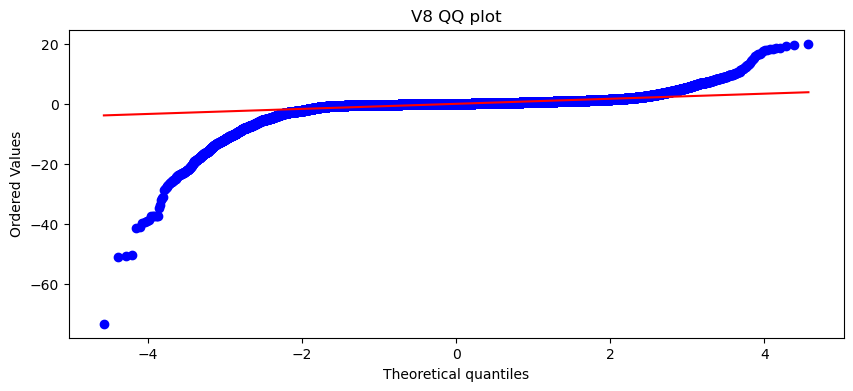

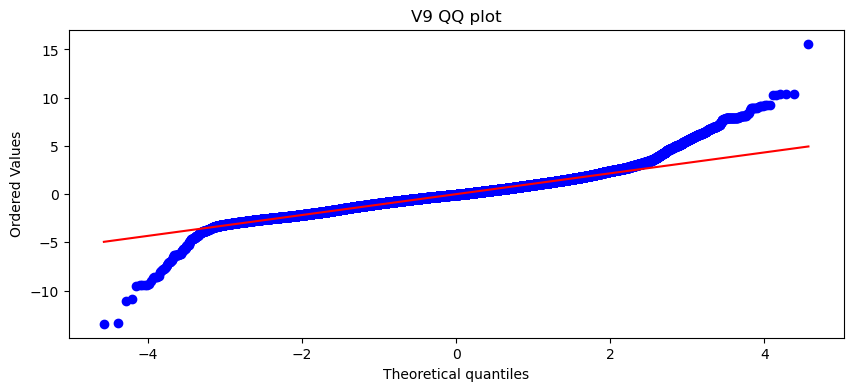

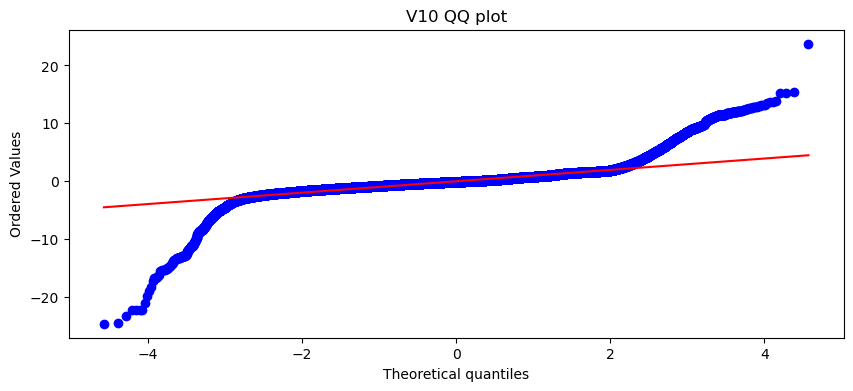

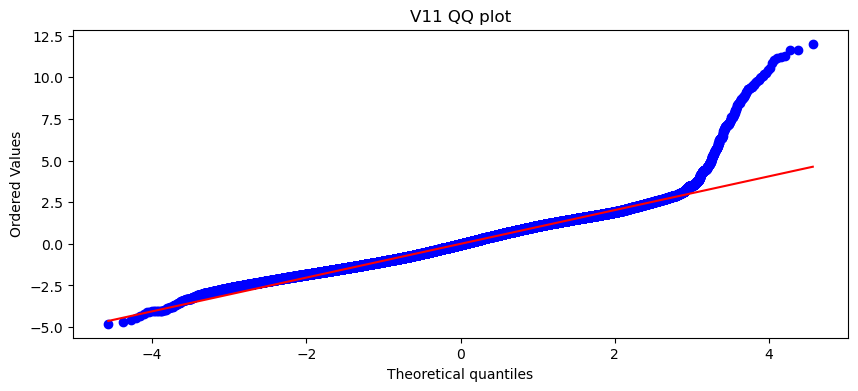

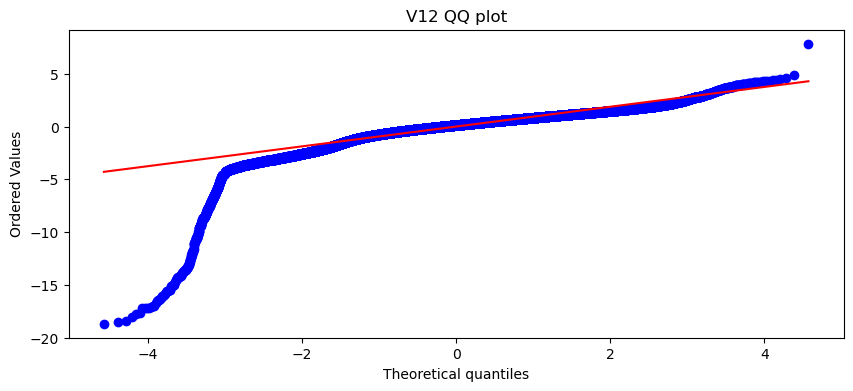

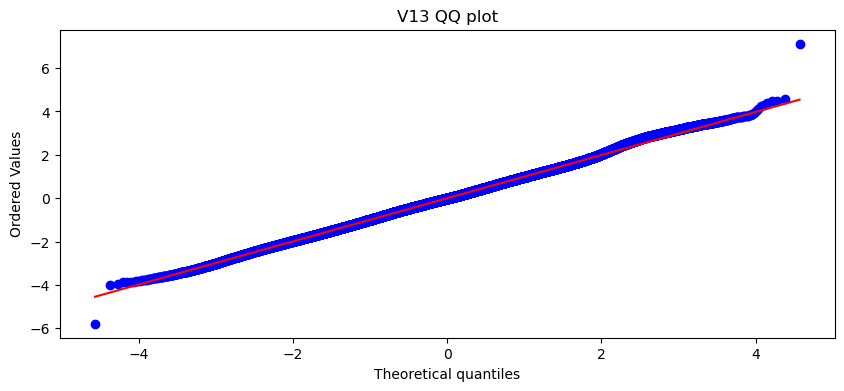

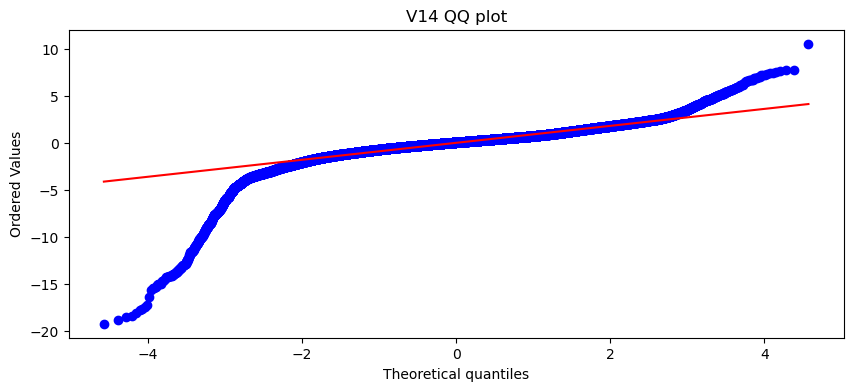

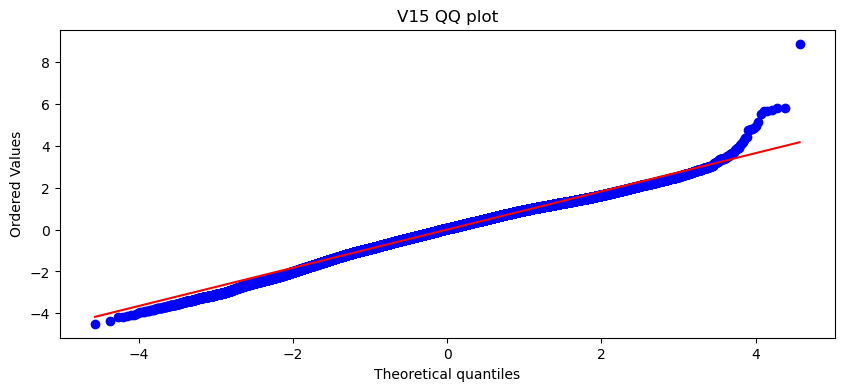

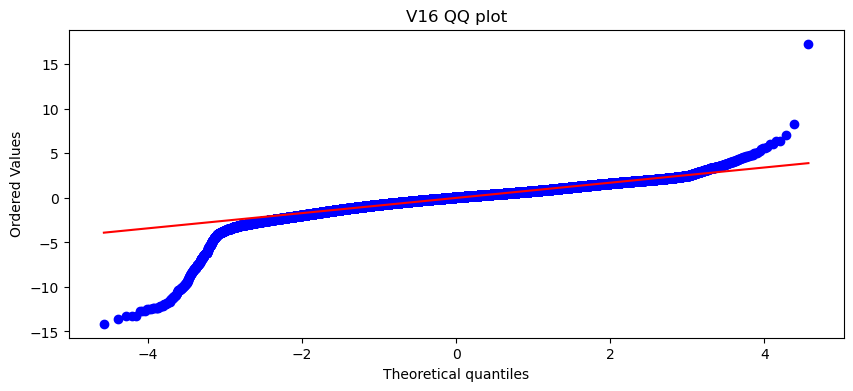

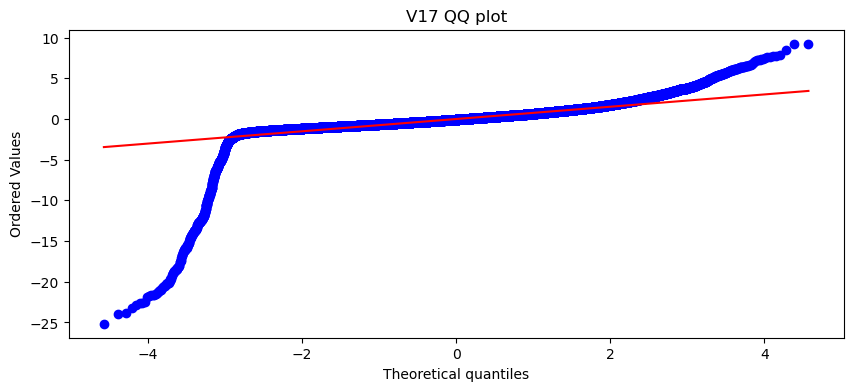

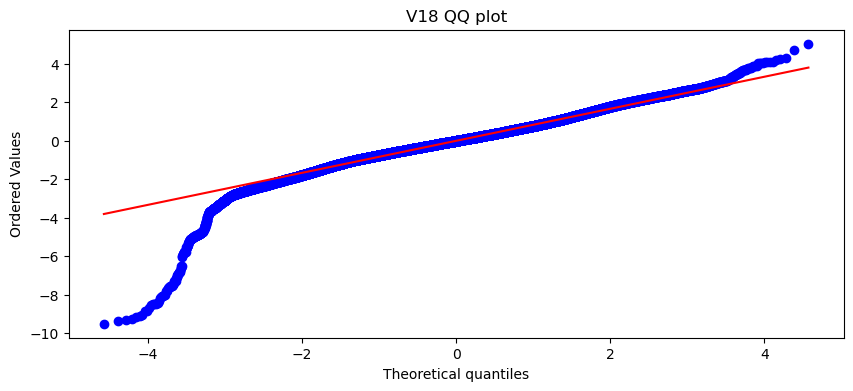

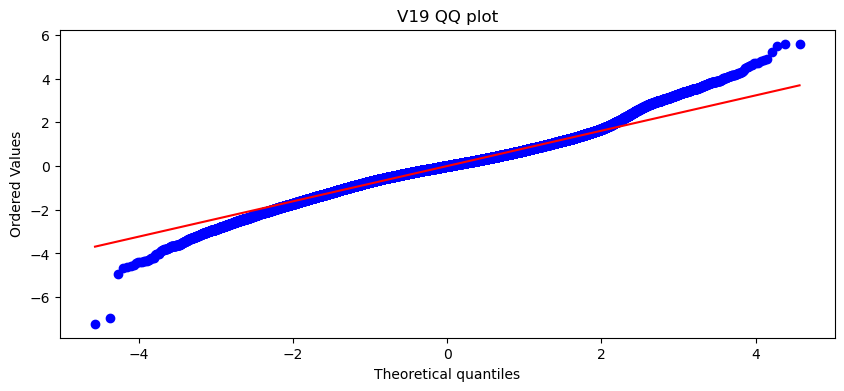

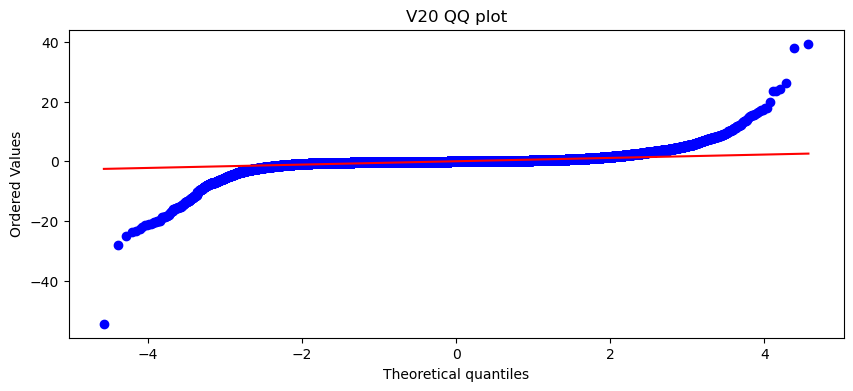

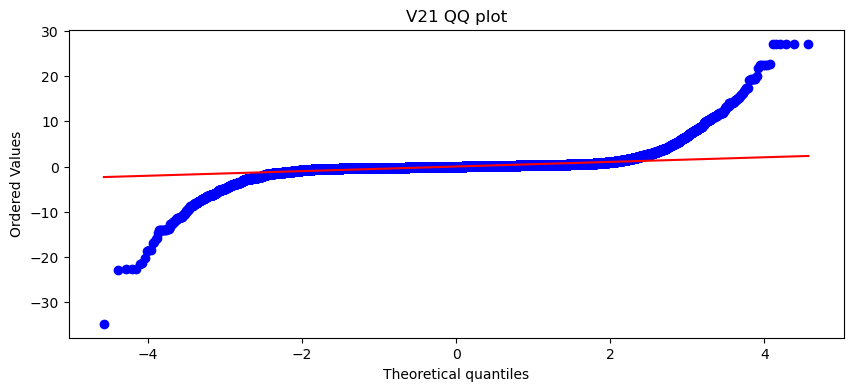

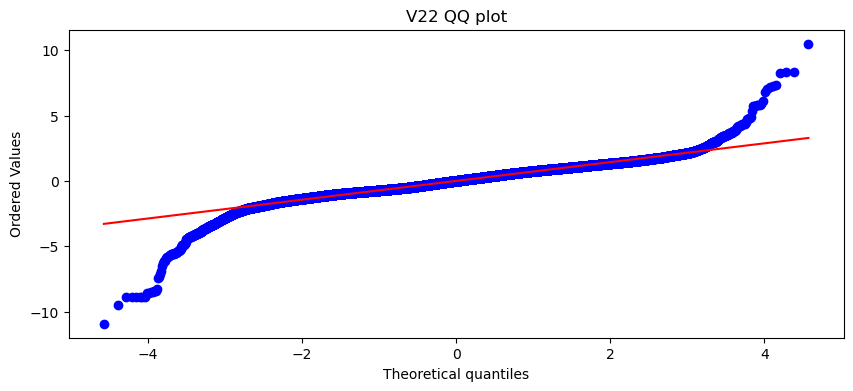

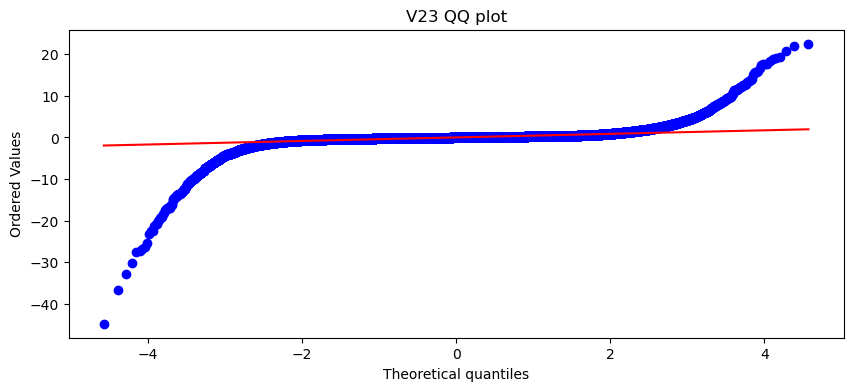

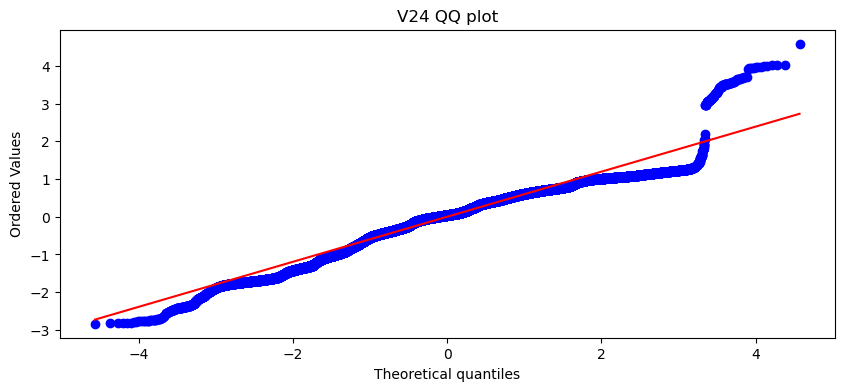

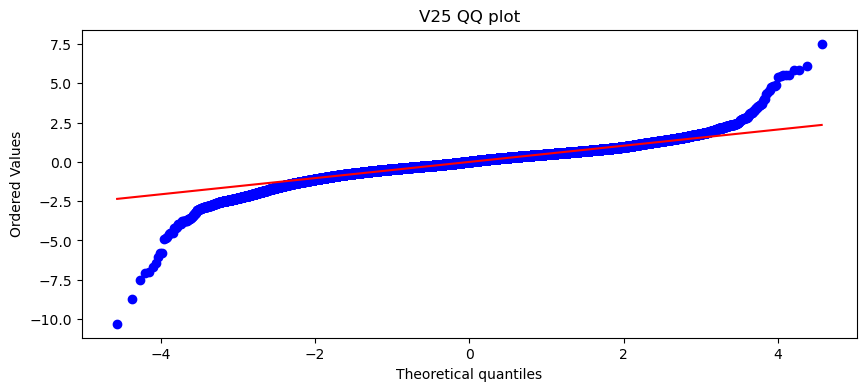

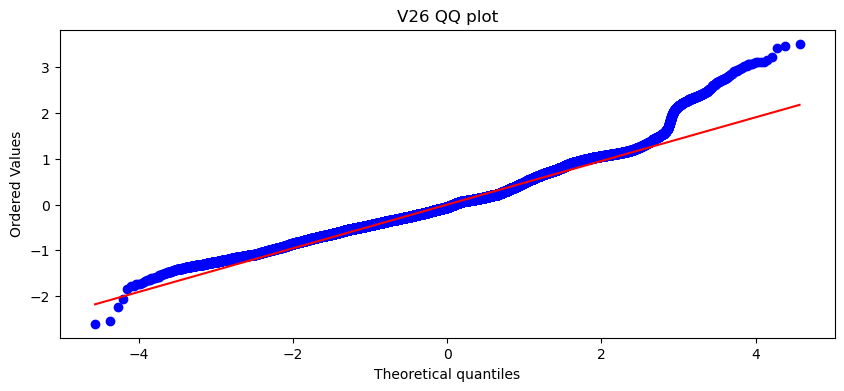

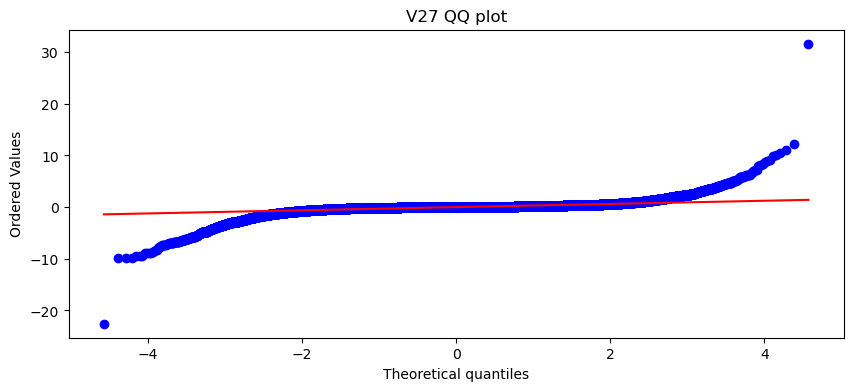

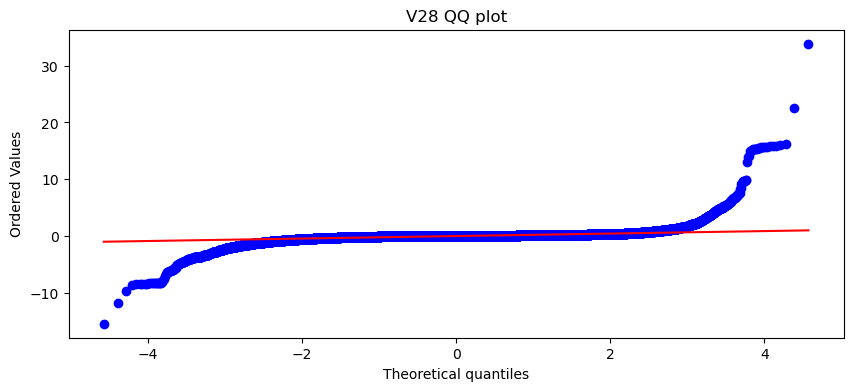

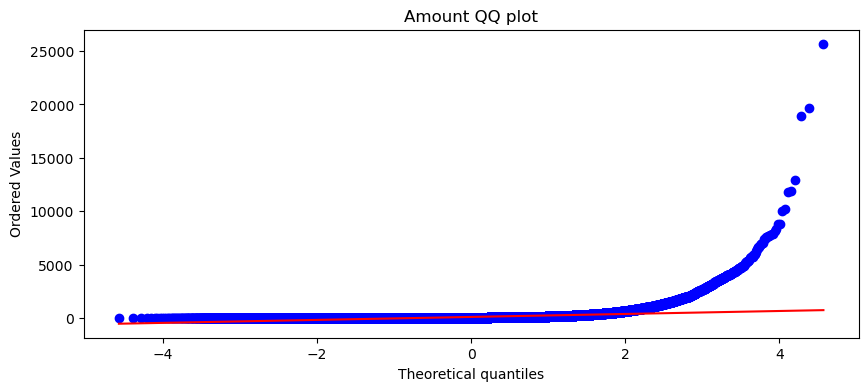

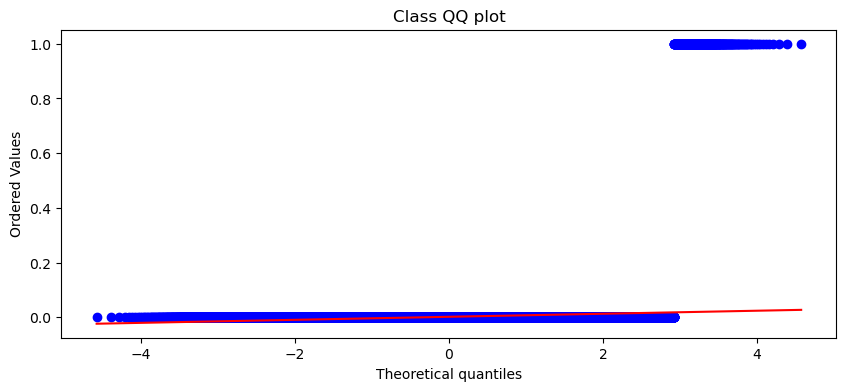

In [5]:
#Check column wise Distribution of Data by the use of QQ plot
for col in df.columns:
    plt.figure(figsize=(10, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col} QQ plot")
    plt.show()

In [6]:
x=df.iloc[:,0:30]
y=df.iloc[:,-1]                #Split the feature and target column

In [7]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [8]:
from sklearn.model_selection import train_test_split,cross_val_score     

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2, test_size=0.20)      #Split train and test data in

In [10]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [11]:
#Noramlization

from sklearn.preprocessing import MinMaxScaler
size_scaler = MinMaxScaler()
size_scaler.fit(x_train)

# Transform training and testing data using the scaler
X_train_scaled = size_scaler.transform(x_train)
X_test_scaled = size_scaler.transform(x_test)

In [12]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=x_test.columns)

In [13]:
X_train_scaled.shape,X_test_scaled.shape,y_train.shape,y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

# Decision Tree

In [14]:
DT = DecisionTreeClassifier(max_depth = 2, criterion = 'gini')  # laoding the decision tree classifier
DT.fit(X_train_scaled, y_train)     
dt_yhat = DT.predict(X_test_scaled)  

In [15]:
dt_yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
print('Accuracy score of the Decision Tree model is', (accuracy_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9993328885923949


In [17]:
print('Precision score of the Decision Tree model is', (precision_score(y_test, dt_yhat,average='macro')))

Precision score of the Decision Tree model is 0.897242521442648


In [18]:
print('recall score of the Decision Tree model is', (recall_score(y_test, dt_yhat,average='macro')))

recall score of the Decision Tree model is 0.8689069671259622


In [19]:
print('F1 score of the Decision Tree model is',f1_score(y_test, dt_yhat,average='macro'))

F1 score of the Decision Tree model is 0.8825490340348847


In [20]:
# Making the confusion matrix
confusion_matrix(y_test, dt_yhat)

array([[56862,    16],
       [   22,    62]], dtype=int64)

In [21]:
#Classificion Report
print(classification_report(y_test, dt_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.79      0.74      0.77        84

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



# Logistic Regression

In [22]:
lg=LogisticRegression()

In [23]:
lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)
y_pred_lg=lg.predict(X_test_scaled)

In [24]:
print('Accuracy score of the Logistic Classifier model is', (accuracy_score(y_test, y_pred_lg)))

Accuracy score of the Logistic Classifier model is 0.9992802219023208


In [25]:
print('Precision score of the Logistic Classifier model is', (precision_score(y_test, y_pred_lg,average='macro')))

Precision score of the Logistic Classifier model is 0.9382977477081685


In [26]:
print('recall score of the Logistic Classifier model is', (recall_score(y_test, y_pred_lg,average='macro')))

recall score of the Logistic Classifier model is 0.7975575124033227


In [27]:
print('F1 score of the Logistic Classifier model is',f1_score(y_test, y_pred_lg))

F1 score of the Logistic Classifier model is 0.7092198581560283


In [28]:
# Making the confusion matrix
print(confusion_matrix(y_test, y_pred_lg))

[[56871     7]
 [   34    50]]


In [29]:
#Classificion Report
print(classification_report(y_test, dt_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.79      0.74      0.77        84

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



# Random Forest

In [30]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy', max_depth=5, min_samples_split=1000, min_samples_leaf=10)
rf.fit(X_train_scaled,y_train)
y_pred_rf=rf.predict(X_test_scaled)

In [31]:
print('Accuracy score of the Random Forest model is', (accuracy_score(y_test, y_pred_rf)))

Accuracy score of the Random Forest model is 0.9992626663389628


In [32]:
print('Precision score of the Random Forestr model is', (precision_score(y_test, y_pred_rf,average='macro')))

Precision score of the Random Forestr model is 0.9190736436305913


In [33]:
print('recall score of the Random Forest model is', (recall_score(y_test, y_pred_rf,average='macro')))

recall score of the Random Forest model is 0.8094359020727739


In [34]:
print('F1 score of the Random Forest model is',f1_score(y_test, y_pred_rf))     

F1 score of the Random Forest model is 0.7123287671232876


In [35]:
# Making the confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[56868,    10],
       [   32,    52]], dtype=int64)

In [36]:
#Classificion Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.84      0.62      0.71        84

    accuracy                           1.00     56962
   macro avg       0.92      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962

